# Dinámica del cuerpo rígido | Tensor de inercia

[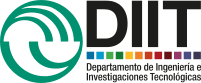](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Cuerpo rígido
> **Referencia**  
Secciones $\S$31 y $\S$32.  
Mecánica  
Landau y Lifschitz  

**Rígido**: si las **distancias son invariantes** entre puntos del sistema.

Tal cosa no existe: es una aproximación.

Frente al desplazamiento $\Delta \vec{r}$ se desprecian cambios:
- forma
- dimensiones

## Distribución y centro de masa

- Cada diferencial de volúmen $d V$ tiene un $d m$
- Masa total 
$$
m = \int d m (\vec{r}) = \iiint \tilde{\rho}(\vec{r}) dV
$$
    - Si no es homogéno la **densidad** $\tilde{\rho}(\vec{r})$ depende de $\vec{r}$
- Centro de masa (centro de inercia)
$$
\vec{r}_{cm} = \frac{1}{m} \iiint \vec{r} \tilde{\rho}(\vec{r}) dV
$$


### La energía cinética de cada pedazo depende de su velocidad
$$
T = \int \frac{d m (\vec{r})}{2} \dot{\vec{r}}^2
$$
Volvemos sobre que es $\dot{\vec{r}}$ cuando hay rotación.

### Velocidad en un sistema no inercial
> Esto es un breve resumen del tema que se desarrolla   
> en el cuaderno Jupyter [arañaFrisbee.ipynb](../09aNoInercial/arañaFrisbee.ipynb)  
> Se recomienda referirse al mismo

#### Velocidad angular de una araña sobre un frisbee

Viendo desde arriba un frisbee rotando en el sentido opuesto a las agujas del reloj  
![](figuras/aranaFrisbee.png "Sistemas de coordenadas para la araña en el frisbee")

el vector velocidad angular de rotación $\dot{\varphi} = \frac{d \varphi}{d t}$ apunta arriba. 

Viendo esto en perspectiva con un vector posición de la araña $\vec{r}$ sabre el frisbee que vuela a cierta altura parte desde un origen fijo al suelo $O$  
![](figuras/lFig5.png "Cambio de posición ante rotación")

Una pequeña variación del ángulo $\delta \varphi$ del frisbee repercute en una respectiva pequeña variación $\delta r$ de la posición de la araña respecto a ese punto fijo en el suelo $\vec{r}_{a/o}$.
El cálculo algebráico del efecto de $d \vec{\varphi} = d \varphi \hat{k}$ es el producto vectorial de estos factores familiarmente conocido como _regla de la mano derecha_ para la rotación
$$
d \vec{r}_{a/o} = d \vec{\varphi} \times \vec{r}_{a/f}
$$


#### Teorema del transporte
La herramienta algebraica de la _regla de la mano derecha_ facilita el análisis de $\vec{r}_{a/o}$ como suma vectorial de la posición de la araña respecto al centro de rotación del frisbee $\vec{r}_{a/f}$ y de la posición de este respecto al punto fijo en el suelo $\vec{r}_{f/o}$
$$
\begin{aligned}
\vec{r}_{a/o} &= \vec{r}_{f/o} + \vec{r}_{a/f} \\
d \vec{r}_{a/o} &= d \vec{r}_{f/o} + d \vec{\varphi} \times \vec{r}_{a/f} \\
\frac{d }{d t} \vec{r}_{a/o}
&= \frac{d }{d t} \vec{r}_{f/o}  + \frac{d }{d t} \vec{\varphi}  \times \vec{r}_{a/f} \\
\dot{\vec{r}}_{a/o} 
&= \dot{\vec{r}}_{f/o} + \vec{\Omega}_{f/o} \times \vec{r}_{a/f}
\end{aligned}
$$

$$
\boxed{
\dot{ \vec{r} }_o = \frac{\mathrm{d}}{\mathrm{d} t} \vec{r}_o = \frac{\mathrm{d}}{\mathrm{d} t} \vec{R}_P + \vec{\Omega}_{P/o} \times \vec{r}_P = \dot{ \vec{R}}_P + \vec{\Omega}_{P/o} \times \vec{r}_P
}
$$
- $\vec{r}_o$ posición respecto al sistema inercial (suelo)
- $\vec{R}_P$ posición del punto donde pasa el eje de rotación
- $\vec{r}_P$ punto que rota en torno a $\vec{R}_P$ con $\vec{\Omega}_{P/o}$ tal que $\vec{r}_o = \vec{R}_P + \vec{r}_P$

### Energía cinética de un sistema discreto
Elementos finitos: partir en una suma discreta

$$
\begin{aligned}
T
&= \int \frac{d m (\vec{r})}{2} \dot{\vec{r}}^2
\simeq \sum_p \frac{m_p }{2} \dot{\vec{r}_p}^2
= \sum_p \frac{m_p }{2} \left( \dot{ \vec{R}} + \vec{\Omega} \times \vec{r}_p \right)^2 \\
&\simeq 
 \dot{ \vec{R}}^2 \sum_p \frac{m_p }{2}
+ \sum_p m_p \dot{ \vec{R}} \left(  \vec{\Omega} \times \vec{r}_p \right)
+ \sum_p \frac{m_p }{2} \left( \vec{\Omega} \times \vec{r}_p \right)^2
\end{aligned}
$$

El termino del medio se anula si el origen es el centro de masa
$$
\sum_p m_p \dot{ \vec{R}} \left( \vec{\Omega} \times \vec{r}_p \right) = \sum_p m_p \vec{r}_p \left( \dot{ \vec{R}} \times \vec{\Omega} \right) =  \left( \dot{ \vec{R}} \times \vec{\Omega} \right) \sum_p m_p \vec{r}_p = 0
$$

El producto vectorial al cuadrado puede re-escribirse (son muchas cuentas)
$$
\left( \vec{\Omega} \times \vec{r}_p \right)^2
= \left( \vec{\Omega} \times \vec{r}_p \right) \cdot \left( \vec{\Omega} \times \vec{r}_p \right)
=  \vec{\Omega}^2 \vec{r}_p^2 - \left( \vec{\Omega} \cdot \vec{r}_p \right)^2
$$

Puede entonces escribirse la energía cinética
$$
T \simeq \frac{m}{2} \left( \dot{\vec{R} } \right)^2 + \frac{1}{2} \sum_p m_p \left[ \vec{\Omega}^2 \vec{r}_p^2 - \left( \vec{\Omega} \cdot \vec{r}_p \right)^2 \right]
$$

donde el primer término es la desplazamiento (del centro de masa) y el segundo es la que corresponde a la rotación.

### Energía cinética de rotación
Utilizaremos la notación tensorial como alternativa a la vectorial.
- Los vectores se resumen en un único subindice entendiendose que se realiza una suma sobre las tres componentes
    - El vector posición $\vec{r}_p$ se decribe por $r_i$
    - Ídem. $\vec{\Omega}$ se describe por $\Omega_i$
- Al darse por entendida la suma sobre el índice $i$, no se escriben los signos de suma $\sum_i$
    - $\vec{A} \cdot \vec{B} = \sum_i A_i B_i$ se resume en $A_i B_i$
    - $\vec{A}^2 = \vec{A} \cdot \vec{A}$ se resumen en $A_i A_i = A_i^2$
    - $\vec{A}^2 \vec{B}^2 = (\vec{A} \cdot \vec{A}) (\vec{B} \cdot \vec{B})$ se resume en $A_i^2 B_k^2$ donde se utilizan subindices distintos para que no se malinterprete como $( \vec{A} \cdot \vec{B} )^2 = (A_i B_i)^2$ 

En la energía cinética de rotación se escribe $\vec{\Omega}^2 \vec{r}_p^2$ como $\Omega_i^2 r_l^2$ usando el subindice $l$ en $r_l$ para diferenciarlo del $i$ en $\Omega_i$
$$
\begin{aligned}
T_\text{rot}
&\simeq \frac{1}{2} \sum_p m_p \left[ \vec{\Omega}^2 \vec{r}_p^2 - \left( \vec{\Omega} \cdot \vec{r}_p \right)^2 \right]
= \frac{1}{2} \sum_p m_p \left[ \Omega_i^2 r_l^2 - \Omega_i r_i \Omega_k r_k \right] \\
&\simeq \frac{1}{2} \sum_p m_p \left[ \Omega_i \Omega_k \delta_{ik} r_l^2 - \Omega_i \Omega_k r_i r_k \right]
= \frac{1}{2} \Omega_i \Omega_k \sum_p m_p \left[ r_l^2 \delta_{ik} - r_i r_k \right]
\end{aligned}
$$
donde para poder sacar el factor común $\Omega_i \Omega_k$ si hizo uso de la [delta de Kronecker](https://es.wikipedia.org/wiki/Delta_de_Kronecker) $\delta_{ii} =1, \delta_{ik} = 0\,(i \neq k)$ para hacer la substitución $\Omega_i^2 = \Omega_i \Omega_k \delta_{ik}$.

El **tensor de inercia** es la cantidad entre corchetes
$$
I_{ik} = \left[ r_l^2 \delta_{ik} - r_i r_k \right]
$$
en la que $r_l$ debe sumarse sobre las tres componentes vectoriales e $i$ y $k$ son los índices de las respectivas componentes.

### Tensor de inercia
Con el tensor de 2.o orden $I_{ik}$ se calcula $T = \frac{m}{2} \dot{\vec{R}}^2 + \frac{1}{2} I_{ik} \Omega_i \Omega_k$

$$
\overline{\overline{I}}
= I_{ik} = 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
=
\begin{pmatrix}
\sum_p m_p (y_p^2 + z_p^2) & - \sum_p m_p x_p y_p & - \sum_p m_p x_p z_p \\
- \sum_p m_p y_p x_p & \sum_p m_p (x_p^2 + z_p^2)  & - \sum_p m_p y_p z_p \\
- \sum_p m_p z_p x_p & - \sum_p m_p z_p y_p & \sum_p m_p (x_p^2 + y_p^2) \\
\end{pmatrix}
$$
- El tensor $\overline{\overline{I}}$ es simétrico
- $I_{xx}, I_{yy}, I_{zz}$: **momentos de inercia**, los otros **productos de inercia**

### Diagonalización de $I_{ik}$
- Los $x_i$ que solo dejan los elementos en la diagonal de $I_{ik}$ son **ejes principales de inercia**, que son los de simetría geométrica del sistema.
En este caso 
$T_\text{rot} = \frac{1}{2} \left( I_1 \Omega_1^2 + I_2 \Omega_2^2 + I_3 \Omega_3^2 \right)$

- Si la rotación se produce en un eje de un sistema $x'_i$ que no pasa por uno centrado en el centro de masa $x_i$ se puede calcular un tensor $I'_{ik}$ a partir del calculado desde el centro de masa $I_{ik}$
$$
I'_{ik} = I_{ik} + M [ a^2 \delta_{ik} - a_i a_k ]
$$
donde $M$ es la masa de todo el sistema y $\vec{a}$ va del origen de este sistema al centro de masa.
Esta expresión es la del [**teorema de ejes paralelos de Steiner**](https://es.wikipedia.org/wiki/Teorema_del_eje_paralelo).
Una vez adicionado este término, y si los ejes del sistema de coordenadas son paralelos a los **ejes principales de inercia**, no habrá productos de inercia en $I_{ik}$.

Para un vector que va desde el origen del sistema de ejes $x'_i$ al centro de masa $\vec{a} = a_x \hat{x} + a_y \hat{y} + a_z \hat{z}$, se tiene que $a^2 = \vec{a} \cdot \vec{a} = a_x^2 + a_y^2 + a_z^2$.
Así el término de Steiner es

$$
M [ a^2 \delta_{ik} - a_i a_k ]
=
\begin{pmatrix}
M (a_y^2 + a_z^2) & - M a_x a_y & - M a_x a_z \\
- M a_y a_x & M (a_x^2 + a_z^2) & - M a_y a_z \\
- M a_z a_x & - M a_z a_y & M (a_x^2 + a_y^2),
\end{pmatrix}
$$
que es también un tensor simétrico. 

### $I_{ik}$ Casos particulares
Si la masa está dispuesta:
- linealmente en $\hat{z} \implies x_p = y_p = 0$
$$
I_{xx} = I_{yy} = \sum_p  m_pz_p^2 \quad I_{zz}= 0
$$

- en un plano $(x,y) \implies z_p = 0$
$$
I_{xx} = \sum_p m_p y_p^2 \quad I_{yy} = \sum_p m_p x_p^2\\
\quad I_{zz} = \sum_p m_p (x_p^2 + y_p^2) = I_{xx} + I_{yy}
$$

### Sistema continuo
En el tensor de inercia $I_{ik}$ la sumatoria sobre posiciones discretas de masas se reemplaza por una integración continua en todo el volumen de la densidad en función de la posición $\tilde{\rho}(\vec{r})$

$$
I_{ik} = \iiint \tilde{\rho}(\vec{r}) \left[ x_l^2 \delta_{ik} -  x_i x_k \right] dV.
$$

$$
\overline{\overline{I}}
= I_{ik} = 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
=
\begin{pmatrix}
\iiint \tilde{\rho}(\vec{r}) (y^2 + z^2) dV  &  - \iiint \tilde{\rho}(\vec{r}) x y dV  &  - \iiint \tilde{\rho}(\vec{r}) x z dV \\
- \iiint \tilde{\rho}(\vec{r}) y x dV  &  \iiint \tilde{\rho}(\vec{r}) (x^2 + z^2) dV  &  - \iiint \tilde{\rho}(\vec{r}) y z dV \\
- \iiint \tilde{\rho}(\vec{r}) z x dV  &  - \iiint \tilde{\rho}(\vec{r}) z y dV  &   \iiint \tilde{\rho}(\vec{r}) (x^2 + y^2) dV \\
\end{pmatrix}
$$

### Finalmente, la energía cinética

Ahora hacemos explicita la expresión completa para la energía cinética en notación vectorial
$$
\begin{aligned}
T
= \frac{m}{2} \dot{\vec{R}}^2 + \frac{1}{2} \overline{\overline{I}} \vec{\Omega}^2
= \frac{m}{2} \dot{\vec{R}}^{\mathrm{tr}} \dot{\vec{R}} &+ \frac{1}{2} \vec{\Omega}^{\mathrm{tr}} \overline{\overline{I}} \vec{\Omega}\\
T = \frac{m}{2} 
\begin{pmatrix}
\dot{R}_x & \dot{R}_y & \dot{R}_z \\
\end{pmatrix}
\begin{pmatrix}
\dot{R}_x \\
\dot{R}_y \\
\dot{R}_z \\
\end{pmatrix} 
&+
\frac{1}{2} 
\begin{pmatrix}
\Omega_x &
\Omega_y &
\Omega_z \\
\end{pmatrix} 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
\begin{pmatrix}
\Omega_x \\
\Omega_y \\
\Omega_z \\
\end{pmatrix}
\\ 
T = \frac{m}{2} 
\left(
\dot{R}_x^2 + \dot{R}_y^2 + \dot{R}_z^2 
\right) 
&+
\frac{1}{2}
\begin{pmatrix}
\Omega_x &
\Omega_y &
\Omega_z \\
\end{pmatrix} 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
\begin{pmatrix}
\Omega_x \\
\Omega_y \\
\Omega_z \\
\end{pmatrix} 
\\ 
\end{aligned}
$$

Si bien esta es la forma general para el tensor $\overline{\overline{I}}$ con una orientación arbitraria, usualmente se hace la rotación que la **diagonaliza**.
Esto se puede hacer con la matriz de rotación que se construye con los autovectores de $\overline{\overline{I}}$ indica la rotación de ejes que se requiere para que en unos nuevos, $\left( \hat{x}', \hat{y}', \hat{z}' \right)$, el sólido presente simetría geométrica.
Tras esa operación la expresión de la energía cinética es más sencilla
$$
\begin{aligned}
T = \frac{m}{2} \dot{\vec{R}}^{\mathrm{tr}} \dot{\vec{R}} &+ \frac{1}{2} \vec{\Omega'}^{\mathrm{tr}} \overline{\overline{I'}} \vec{\Omega'}\\
T = \frac{m}{2} 
\begin{pmatrix}
\dot{R}_x & \dot{R}_y & \dot{R}_z \\
\end{pmatrix}
\begin{pmatrix}
\dot{R}_x \\
\dot{R}_y \\
\dot{R}_z \\
\end{pmatrix}
&+
\frac{1}{2} 
\begin{pmatrix}
\Omega_x' &
\Omega_y' &
\Omega_z' \\
\end{pmatrix} 
\begin{pmatrix}
I_{x'x'} & 0 & 0 \\
0 & I_{y'y'} & 0 \\
0 & 0 & I_{z'z'} \\
\end{pmatrix}
\begin{pmatrix}
\Omega_x' \\
\Omega_y' \\
\Omega_z' \\
\end{pmatrix} 
\\
T = \frac{m}{2} 
\left(
\dot{R}_x^2 + \dot{R}_y^2 + \dot{R}_z^2 
\right) 
&+
\frac{1}{2}
\begin{pmatrix}
\Omega_x' &
\Omega_y' &
\Omega_z' \\
\end{pmatrix} 
\begin{pmatrix}
I_{x'x'} \Omega_x' \\
I_{y'y'} \Omega_y' \\
I_{z'z'} \Omega_z' \\
\end{pmatrix} 
\\
T = \frac{m}{2} 
\left(
\dot{R}_x^2 + \dot{R}_y^2 + \dot{R}_z^2 
\right) 
&+
\frac{1}{2} 
\left(
I_{x'x'} \Omega_x'^2 +
I_{y'y'} \Omega_y'^2 +
I_{z'z'} \Omega_z'^2 
\right)
\; \llap{\mathrel{\boxed{\phantom{T = \frac{m}{2} 
\left(
\dot{R}_x^2 + \dot{R}_y^2 + \dot{R}_z^2 
\right) 
+
\frac{1}{2} 
\left(
I_{x'x'} \dot{\Omega}_x'^2 +
I_{y'y'} \dot{\Omega}_y'^2 +
I_{z'z'} \dot{\Omega}_z'^2 
\right)}}}}
\end{aligned},
$$
pues en el tensor $\overline{\overline{I}}$ solo sobreviven los elementos en la diagonal, los momentos de inercia.

## Momentos de inercia de sólidos simples
>**Referencia**   
[Lista de tensiones de inercia en 3 dimensiones](https://es.wikipedia.org/wiki/Anexo:Momentos_de_inercia#Lista_de_tensores_de_inercia_en_3_dimensiones)  
Wikipedia  

### **Cilíndro homogéneo**   
![](figuras/Moment_of_inertia_solid_cylinder.svg.png)

Es conveniente trabajar en coordenadas cilíndricas, por lo que $dV = \rho d\rho d\varphi dz$, ya que $\rho$ es el jacobiano para este sistema de coordenadas.

Para evitar una confusión del radio de coordenadas cilíndricas $\rho$ con la densidad notaremos esta última $\tilde{\rho}$.

Recordamos la expresión de los elementos del tensor de inercia para un sistema continuo

$$
I_{ik} = \iiint \tilde{\rho}(\vec{r}) \left[ x_l^2 \delta_{ik} -  x_i x_k \right] dV .
$$

Para calcular $I_{zz}$, el momento de inercia en la dirección de $\hat{z}$, se tiene que $i=z$ e $k=z$

$$
\begin{aligned}
I{zz} 
&= \iiint \tilde{\rho}(\vec{r}) \left[ x^2 + y^2 + z^2 - zz \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ x^2 + y^2 \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \left(\rho^2 \cos^2{\varphi} \right) + \left(\rho^2 \sin^2{\varphi} \right) \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \rho^2 \left( \cos^2{\varphi} + \sin^2{\varphi} \right) \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \rho^2 \right] dV \\
&= \int_{-h/2}^{h/2} \int_0^{2\pi} \int_0^R \tilde{\rho}(\vec{r}) \left[ \rho^2 \right] \rho d\rho  d\varphi  dz .
\end{aligned}
$$

Para determinar $\left[ x_l^2 \delta_{ik} - x_i x_k \right]$ no es necesario recalcularlo cada vez. 
Basta con referirse a la expresión del tensor de inercia $\overline{\overline{I}}$ ya vista, donde para $I_{zz}$ corresponde

$$
x^2 + y^2 = \rho^2 (\cos^2{\varphi} + \sin^2{\varphi}) = \rho^2
$$

In [1]:
import sympy as sym

In [2]:
rho, varphi, z = sym.symbols(r'rho \varphi z')
jacobianoCilindricas = rho
rho_densidad = sym.Symbol(r'\tilde{\rho}')
a, R, h= sym.symbols('a, R, h', positive=True) # radio y largo del cilíndro

In [3]:
Izz_integrando = jacobianoCilindricas* rho_densidad* rho**2
Izz = sym.Eq(sym.Symbol('I_{zz}'),
                      sym.Integral(Izz_integrando, (rho, 0, R), (varphi, 0, 2* sym.pi), (z, -h/2, h/2) )
                     )
Izz

Eq(I_{zz}, Integral(\tilde{\rho}*rho**3, (rho, 0, R), (\varphi, 0, 2*pi), (z, -h/2, h/2)))

Este cilindro tiene densidad homogénea, es decir que no depende de la posición $\tilde{\rho}(\vec{r}) = \tilde{\rho}$.
Para calcularla basta obtener

In [4]:
m_integrando = jacobianoCilindricas* rho_densidad
m = sym.Eq(sym.symbols('m'), 
           sym.Integral(m_integrando, (rho, 0, R), (varphi, 0, 2* sym.pi), (z, -h/2, h/2) )
          )
m

Eq(m, Integral(\tilde{\rho}*rho, (rho, 0, R), (\varphi, 0, 2*pi), (z, -h/2, h/2)))

In [5]:
m.doit()

Eq(m, pi*R**2*\tilde{\rho}*h)

De donde se obtiene

In [6]:
densidad = sym.Eq( rho_densidad, sym.solveset(m.doit(), rho_densidad).args[0] )
densidad

Eq(\tilde{\rho}, m/(pi*R**2*h))

In [7]:
Izz.subs(densidad.lhs, densidad.rhs)

Eq(I_{zz}, Integral(m*rho**3/(pi*R**2*h), (rho, 0, R), (\varphi, 0, 2*pi), (z, -h/2, h/2)))

In [8]:
Izz.subs(densidad.lhs, densidad.rhs).doit()

Eq(I_{zz}, R**2*m/2)

Para calcular $I_{yy}$ (que es igual a $I_{xx}$) hay que integrar $[x^2 + z^2]$

$$
x^2 + z^2 = \rho^2 \cos^2{\varphi} + z^2
$$

In [9]:
Iyy_integrando = jacobianoCilindricas* rho_densidad* (rho**2* sym.cos(varphi)**2 + z**2)
Iyy = sym.Eq(sym.Symbol('I_{yy}'),
                      sym.Integral(Iyy_integrando, (rho, 0, R), (varphi, 0, 2* sym.pi), (z, -h/2, h/2) )
                     )
Iyy

Eq(I_{yy}, Integral(\tilde{\rho}*rho*(rho**2*cos(\varphi)**2 + z**2), (rho, 0, R), (\varphi, 0, 2*pi), (z, -h/2, h/2)))

In [10]:
Iyy.subs(densidad.lhs, densidad.rhs).doit()

Eq(I_{yy}, R**2*m/4 + h**2*m/12)

### **Varilla** que rota en torno a su centro   
![](figuras/Moment_of_inertia_rod_center.svg.png)  

Cilíndro con $r \ll l$ rotando sobre un eje perpendicular a su longitud $l$ que pasa por su centro.   
El eje $\hat{z}$ está alineado con $l$ y $r \ll l \implies x, y \simeq 0$    
$$
I_{xx} = I_{yy} = \int_{l/2}^{l/2} \frac{m}{l} \left(z^2 \right) dz = \frac{m}{l} \frac{z^3}{3}\bigg\rvert_{l/2}^{l/2} = \frac{m l^2}{12} \quad I_{zz}= 0
$$

$\tilde{\rho} = \frac{m}{l}$.

### **Varilla** que rota desde un extremo   
![](figuras/240px-Moment_of_inertia_rod_end.svg.png)  

El [teorema de Steiner](https://es.wikipedia.org/wiki/Teorema_del_eje_paralelo) permite calcular rotaciones en torno a ejes paralelos al que pasan por el centro de masa simplemente adicionando
$$
M r^2
$$
siendo $M$ la masa del sistema y $r$ la distancia entre ambos ejes.

Para la varilla rotando en torno a un extremo
$$
I_{xx} = I_{yy} = I_{xx, \mathrm{centro\,de\,masa}} + m \left(\frac{l}{2}\right)^2 =  m l^2 \left( \frac{1}{12} + \frac{1}{4} \right) =  \frac{m l^2}{3}
$$

### **Cáscara esférica**
![](figuras/261px-Spherical_shell_moment_of_inertia.png)

$r= r_2$ con cavidad esférica concéntrica $r = r_1<r_2$
$$
x^2 + y^2 = \rho^2 (\cos^2{\varphi} + \sin^2{\varphi}) = \rho^2 \implies I_{zz} = \int^{\pi}_{0} \int^{2 \pi}_{0} \int^{r_2}_{r_1} \frac{m}{\frac{4\pi}{3} (r_2^3 -  r_1^3)} \rho^2 \sin{\theta} \left(\rho^2 \right) d\rho d\varphi d\theta = \frac{2 m}{5} \left( \frac{r_2^5 - r_1^5}{r_2^3 - r_1^3} \right)
$$

$\tilde{\rho} = \frac{m}{\frac{4\pi}{3} (r_2^3 -  r_1^3)}$.